In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

## h(t), 2 газа

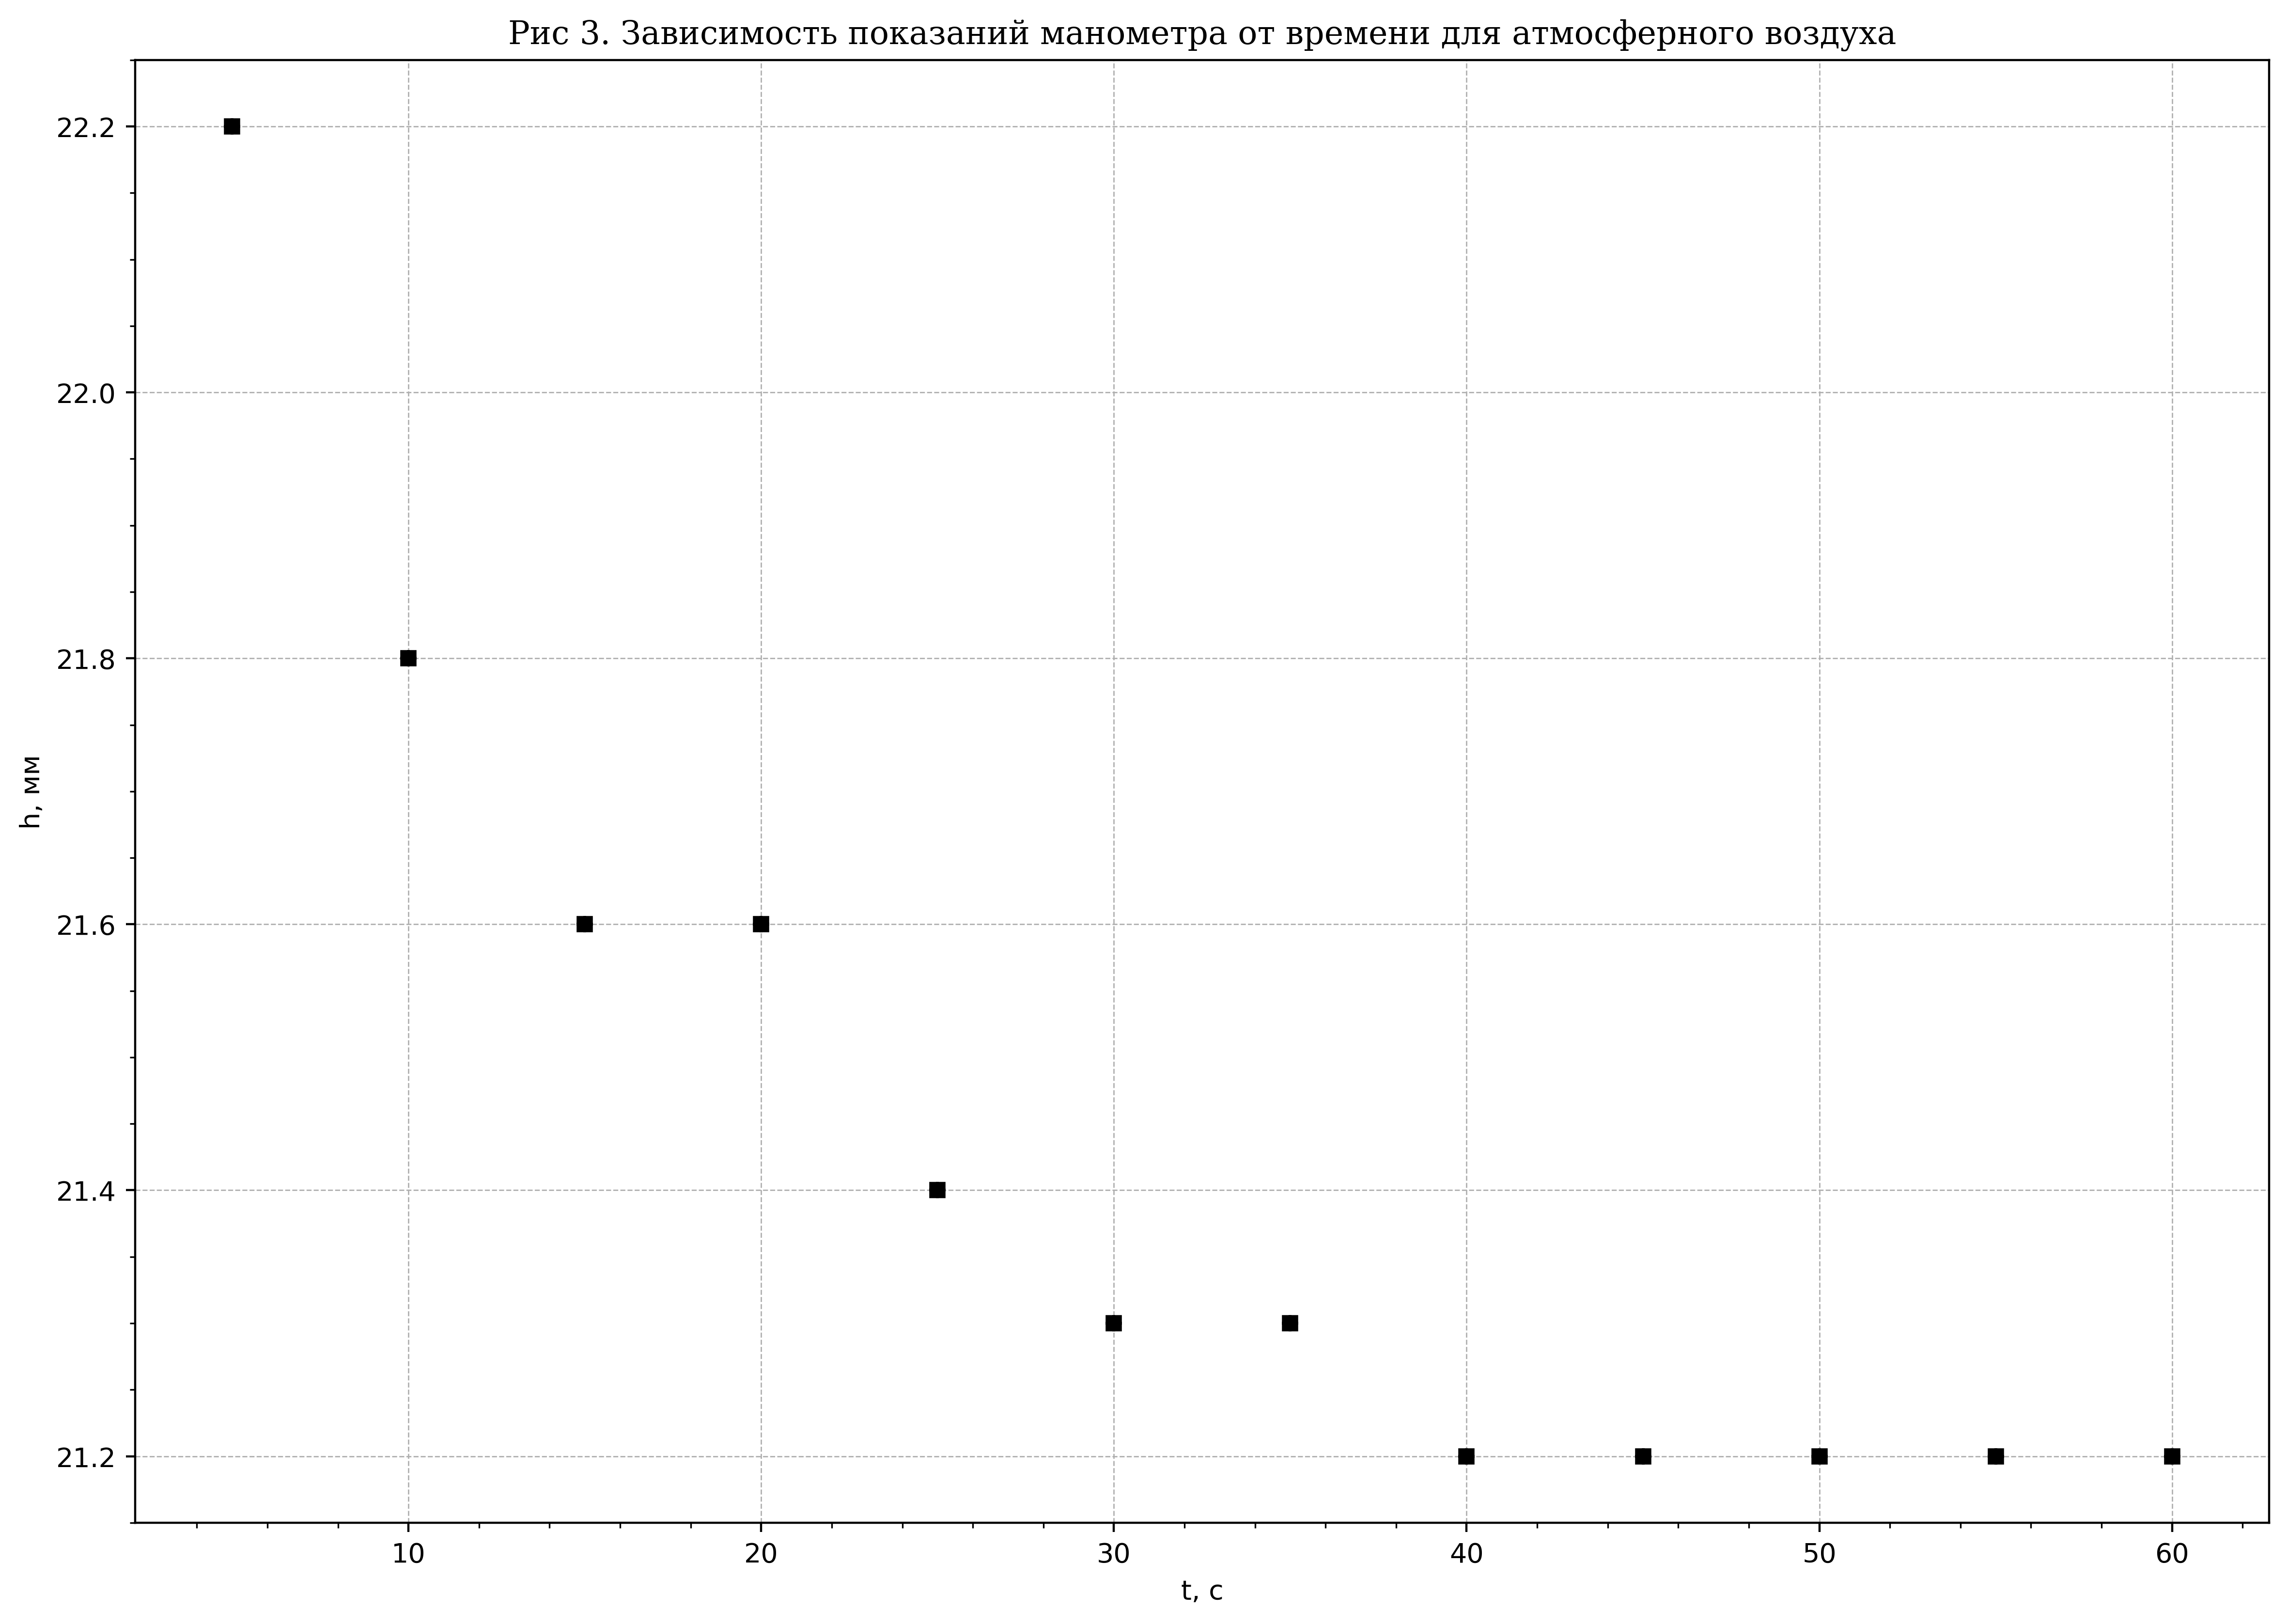

In [4]:
ts = np.array( [5,
10,
15,
20,
25,
30,
35,
40,
45,
50,
55,
60] )
hs = np.array( [22.2,
21.8,
21.6,
21.6,
21.4,
21.3,
21.3,
21.2,
21.2,
21.2,
21.2,
21.2]) 

FONT = {'fontname': 'DejaVu Serif'}
fig2 = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
#spec = fig2.add_gridspec(2, 1)
#ax_a = fig2.add_subplot(spec[0, 0])
ax_a = fig2.add_subplot()
#ax_c = fig2.add_subplot(spec[1, 0])
[ax.minorticks_on() for ax in fig2.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig2.axes]
[ax.set_xlabel('t, c') for ax in fig2.axes]
[ax.set_ylabel('h, мм') for ax in fig2.axes]
ax_a.set_title('Рис 3. Зависимость показаний манометра от времени для атмосферного воздуха', **FONT) 
# ax_c.set_title('Рис 4. Зависимость показаний манометра от времени для углекислого газа', **FONT) 

ax_a.errorbar(ts, hs, fmt='ks', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0, yerr=0,
    capsize=3, zorder=3
)
plt.savefig("h_t.png")

## gamma

### Воздух

Ср. время одного оборота 0.745 +- 0.026412479013130277
Ср. время протекания воздуха во время одного оборота 0.24833333333333332 +- 0.008804159671043426
Время 		1	3	5			10			17	 оборотов
0.24833333333333332	0.745	1.2416666666666667	2.4833333333333334	4.221666666666667
[1.3896103896103895, 1.3428571428571427, 1.3283582089552237]
[1.263157894736842, 1.2885906040268456, 1.2600000000000002]
[1.1914893617021278, 1.2380952380952381, 1.246376811594203]
[1.176470588235294, 1.166666666666667, 1.1886792452830188]
[1.1428571428571428, 1.391304347826087, 1.1568627450980393]
Коэффиценты прямой: k, s_k, b, s_b
-0.04361956471279816	0.007268488461132391	1.313103510582093	0.010362695212214477
gamma при 0.1 с = 1.3087415541108132
+- 0.01038815485571663
Ср. время одного оборота 0.8424999999999999 +- 0.021320959953372957
Ср. время протекания воздуха во время одного оборота 0.2808333333333333 +- 0.007106986651124319
Время 		1	3	5			10			17	 оборотов
0.2808333333333333	0.8425	1.4041666666666666	2.80833333333

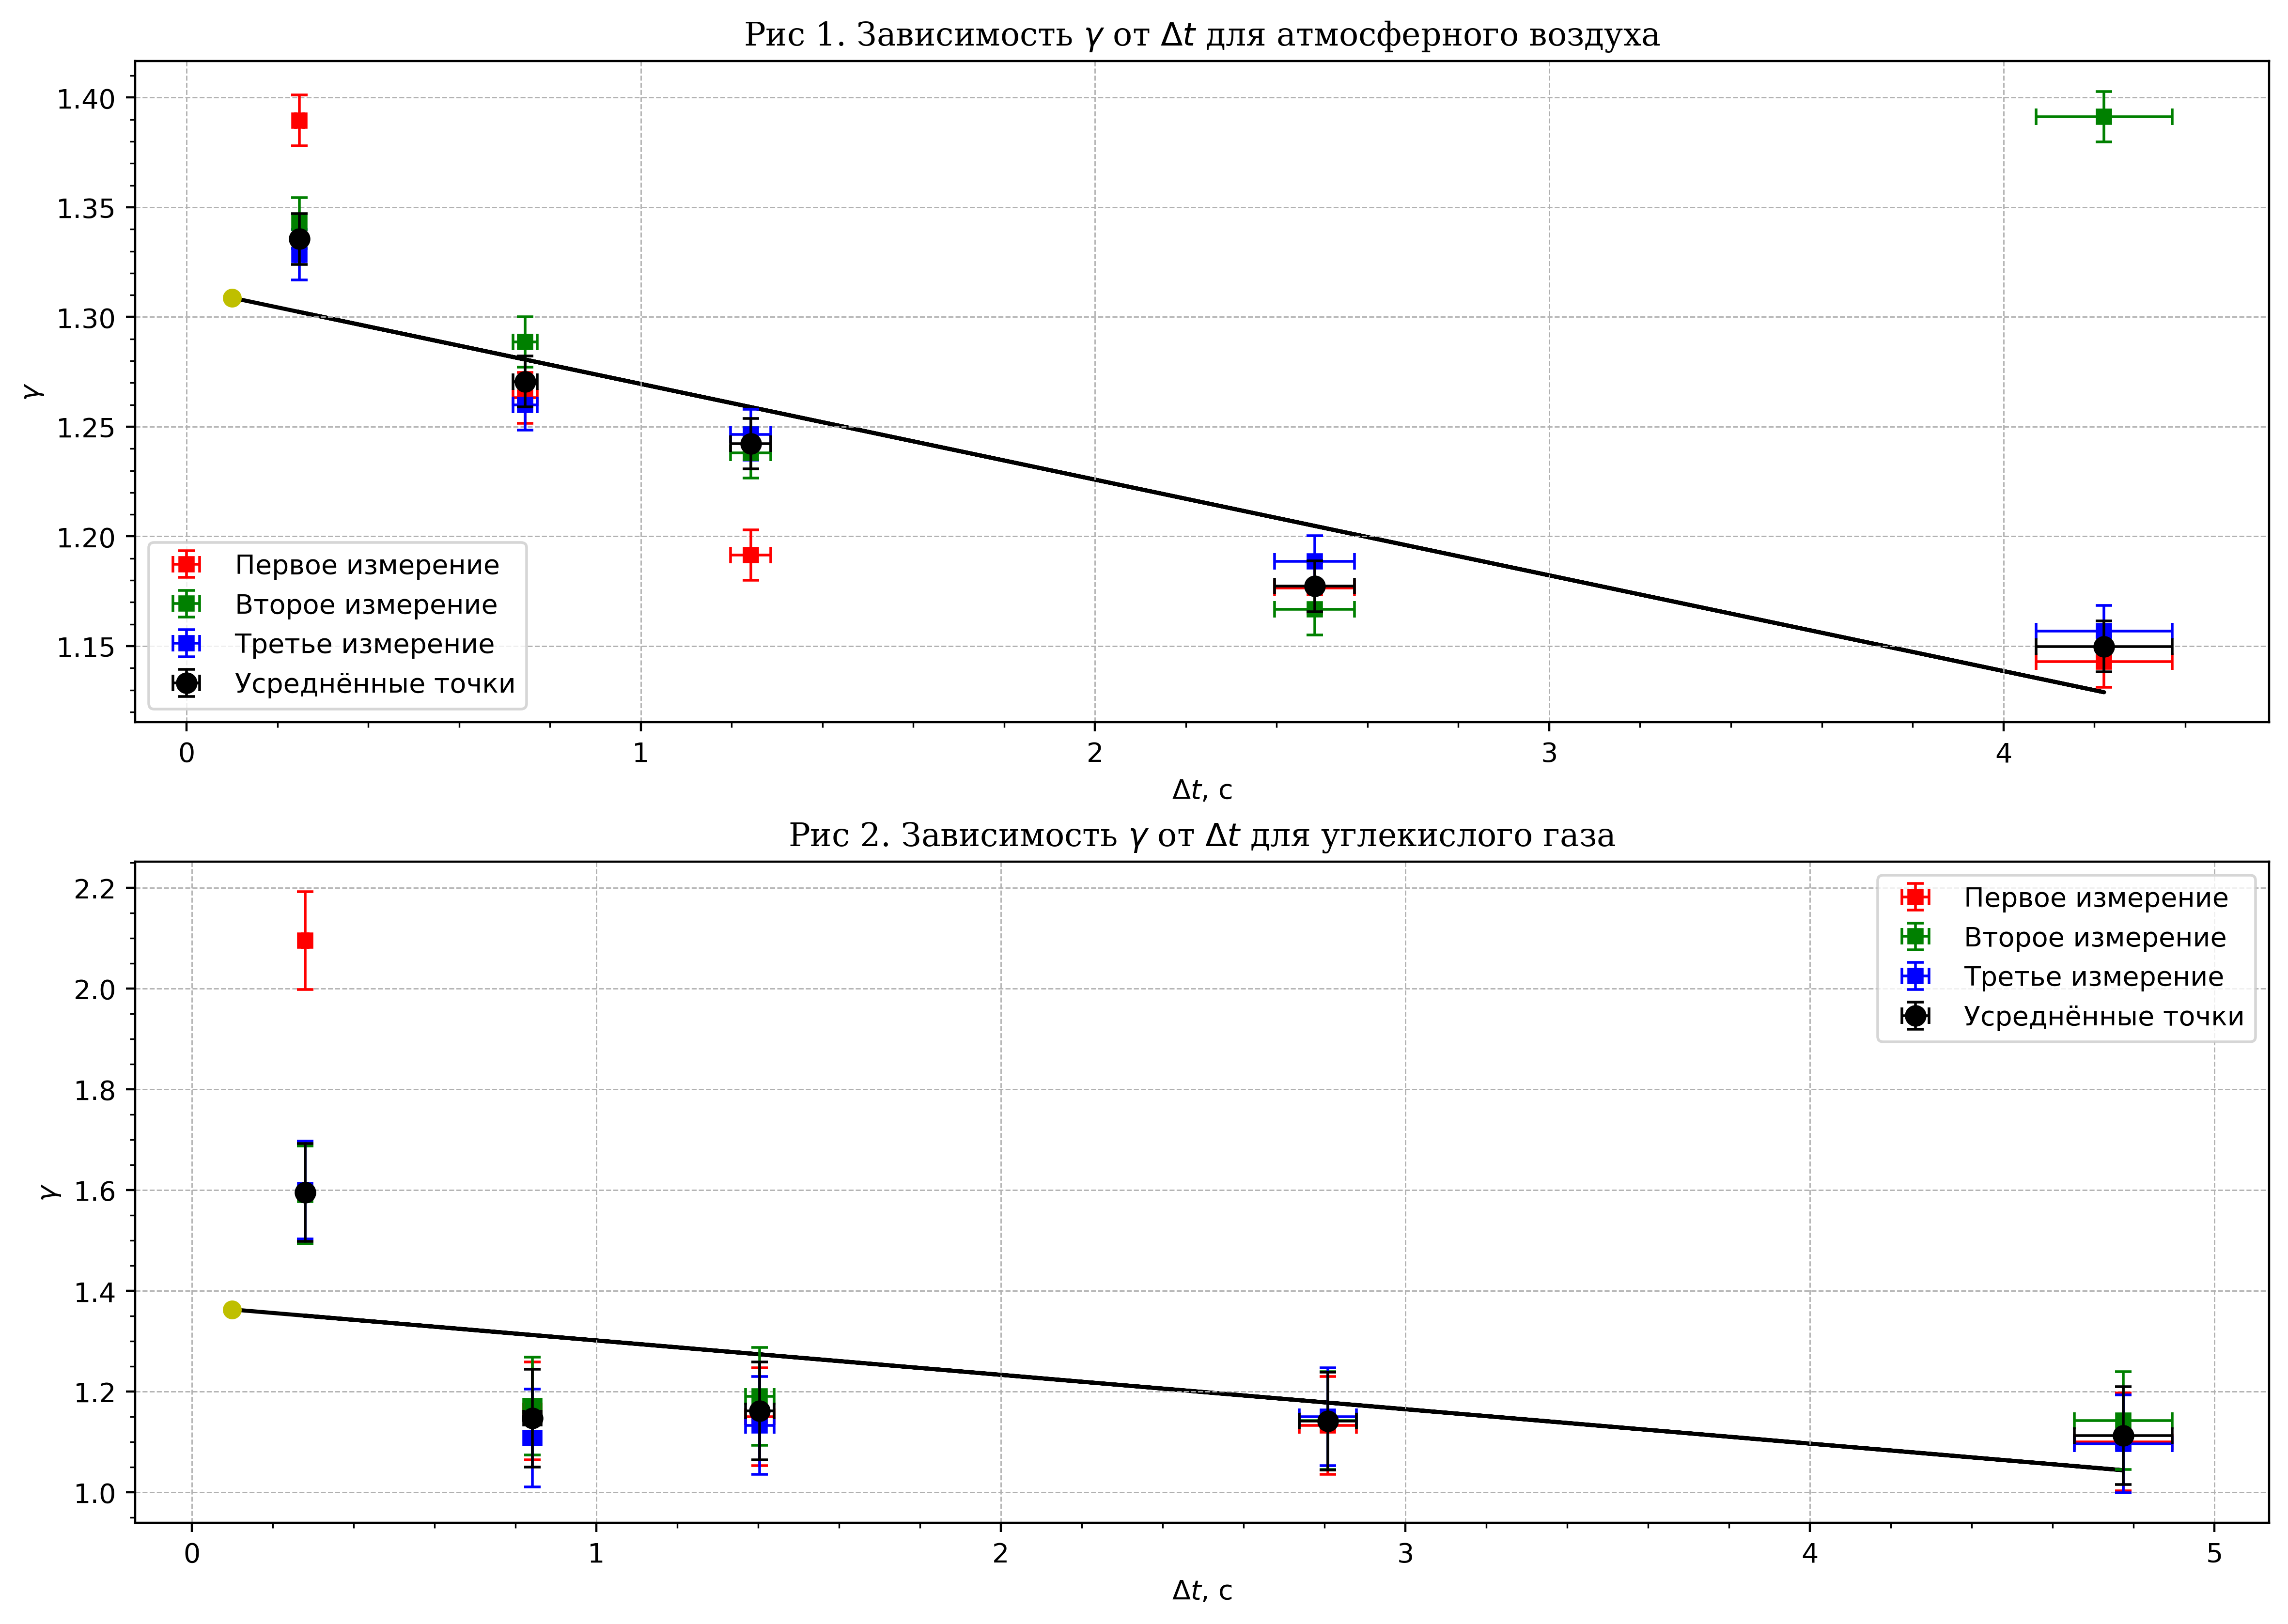

In [3]:
two_rot_times = np.array( [1.51, 1.44, 1.37, 1.76, 1.55, 1.46, 1.34] )
sigma_t = np.std(two_rot_times, ddof=1)
sigma_avg_t = sigma_t / np.sqrt( len(two_rot_times) )
avg_time = np.mean(two_rot_times)
print(f'Ср. время одного оборота {avg_time / 2} +- {sigma_avg_t / 2}')

one_rot_open_t = (avg_time / 2) / 3
print(f'Ср. время протекания воздуха во время одного оборота {one_rot_open_t} +- {sigma_avg_t / 2 / 3}')
print(f'Время \t\t1\t3\t5\t\t\t10\t\t\t17\t оборотов')
print(f'{one_rot_open_t}\t{one_rot_open_t * 3}\t{one_rot_open_t*5}\t{one_rot_open_t*10}\t{one_rot_open_t*17}')
################################
def gamma(h1, h3):
    return h1 / (h1 - h3)

h1_1 = np.array( [18.85, 18.2, 22.4] ) - 13.5
h3_1 = np.array( [15,    14.7, 15.7] ) - 13.5
#print(h1_1, h3_1)
# print(gamma(18.2 - 13.5,  14.7- 13.5))
gammas_1 = []
[ gammas_1.append( gamma(h1, h3) ) for h1, h3 in zip(h1_1, h3_1) ]
print(gammas_1)

h1_3 = np.array( [18.3, 23.1,  19.8] ) - 13.5
h3_3 = np.array( [14.5, 15.65, 14.8] ) - 13.5
#print(h1_3, h3_3)
gammas_3 = []
[ gammas_3.append( gamma(h1, h3) ) for h1, h3 in zip(h1_3, h3_3) ]
print(gammas_3)

h1_5 = np.array( [19.2, 16.2, 22.2] ) - 13.6
h3_5 = np.array( [14.5, 14.1, 15.3] ) - 13.6
#print(h1_5, h3_5)
gammas_5 = []
[ gammas_5.append( gamma(h1, h3) ) for h1, h3 in zip(h1_5, h3_5) ]
print(gammas_5)

h1_10 = np.array( [22.6,  16.4, 19.9] ) - 13.6
h3_10 = np.array( [14.95, 14.0, 14.6] ) - 13.6
#print(h1_10, h3_10)
gammas_10 = []
[ gammas_10.append( gamma(h1, h3) ) for h1, h3 in zip(h1_10, h3_10) ]
print(gammas_10)

h1_17 = np.array( [26.4, 16.8, 19.5] ) - 13.6
h3_17 = np.array( [15.2, 14.5, 14.4] ) - 13.6
#print(h1_17, h3_17)
gammas_17 = []
[ gammas_17.append( gamma(h1, h3) ) for h1, h3 in zip(h1_17, h3_17) ]
print(gammas_17)

###########################
FONT = {'fontname': 'DejaVu Serif'}
fig1 = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig1.add_gridspec(2, 1)
ax_air = fig1.add_subplot(spec[0, 0])
ax_co2 = fig1.add_subplot(spec[1, 0])
[ax.minorticks_on() for ax in fig1.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig1.axes]
[ax.set_xlabel('$\Delta t$, c') for ax in fig1.axes]
[ax.set_ylabel('$\gamma$') for ax in fig1.axes]
ax_air.set_title('Рис 1. Зависимость $\gamma$ от $\Delta t$ для атмосферного воздуха', **FONT) 
ax_co2.set_title('Рис 2. Зависимость $\gamma$ от $\Delta t$ для углекислого газа', **FONT) 
###########################


dTs_air = np.array ( [ one_rot_open_t, one_rot_open_t * 3, one_rot_open_t*5, one_rot_open_t*10, one_rot_open_t*17 ] )
GAMMAS_air = [ gammas_1[0], gammas_3[0], gammas_5[0], gammas_10[0], gammas_17[0] ]
sigma_dt = sigma_avg_t / 2 / 3
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
max_h3 = max(np.maximum.reduce([h3_1, h3_3, h3_5, h3_10, h3_17]))
max_h1 = max(np.maximum.reduce([h1_1, h1_3, h1_5, h1_10, h1_17]))
sigma_h = 0.1
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_air.errorbar(dTs_air, GAMMAS_air, fmt='rs', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Первое измерение'
)

GAMMAS_air = [ gammas_1[1], gammas_3[1], gammas_5[1], gammas_10[1], gammas_17[1] ]
sigma_dt = sigma_avg_t / 2 / 3
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_air.errorbar(dTs_air, GAMMAS_air, fmt='gs', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Второе измерение'
)

GAMMAS_air = [ gammas_1[2], gammas_3[2], gammas_5[2], gammas_10[2], gammas_17[2] ]
sigma_dt = sigma_avg_t / 2 / 3
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_air.errorbar(dTs_air, GAMMAS_air, fmt='bs', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Третье измерение'
)

GAMMAS_air = np.array( [ np.mean([gammas_1[2],  gammas_1[1]]), 
               np.mean([gammas_3[2],  gammas_3[1], gammas_3[0]]), 
               np.mean([gammas_5[2],  gammas_5[1]]),
               np.mean([gammas_10[0], gammas_10[1], gammas_10[2]]), 
               np.mean([gammas_17[0], gammas_17[2]]) ] )
sigma_dt = sigma_avg_t / 2 / 3
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_air.errorbar(dTs_air, GAMMAS_air, fmt='ko', linewidth=0, markersize=7, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=5,
    label='Усреднённые точки'
)

(k, s_k, b, s_b) = lin_ls(dTs_air, GAMMAS_air, through_null=False)
dTs_air = np.append(dTs_air, 0.1)
ax_air.plot(dTs_air, dTs_air * k + b, color='k', zorder=-1)
ax_air.scatter(0.1, 0.1 * k + b, color='y')
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
print(f'gamma при 0.1 с = {0.1 * k + b}')
sigma_gam = np.sqrt(
    np.square(0.1 * s_k) +
    np.square(s_b)
)
print(f'+- {sigma_gam}')
##################################################
##################################################
two_rot_times = np.array( [1.62, 1.57, 1.85, 1.69, 1.76, 1.62] )
sigma_t = np.std(two_rot_times, ddof=1)
sigma_avg_t = sigma_t / np.sqrt( len(two_rot_times) )
avg_time = np.mean(two_rot_times)
print(f'Ср. время одного оборота {avg_time / 2} +- {sigma_avg_t / 2}')

one_rot_open_t = (avg_time / 2) / 3
print(f'Ср. время протекания воздуха во время одного оборота {one_rot_open_t} +- {sigma_avg_t / 2 / 3}')
print(f'Время \t\t1\t3\t5\t\t\t10\t\t\t17\t оборотов')
print(f'{one_rot_open_t}\t{one_rot_open_t * 3}\t{one_rot_open_t*5}\t{one_rot_open_t*10}\t{one_rot_open_t*17}')

h1_1 = 16.7 - np.array( [12.3, 14.95, 13.5] )
h3_1 = 16.7 - np.array( [14.4, 16.05, 15.5] )
#print(h1_1, h3_1)
# print(gamma(18.2 - 13.5,  14.7- 13.5))
gammas_1 = []
[ gammas_1.append( gamma(h1, h3) ) for h1, h3 in zip(h1_1, h3_1) ]
print(gammas_1)

h1_3 = 16.7 - np.array( [12.4, 12.6, 12.6] )
h3_3 = 16.7 - np.array( [16.1, 16.1, 16.3] )
#print(h1_3, h3_3)
gammas_3 = []
[ gammas_3.append( gamma(h1, h3) ) for h1, h3 in zip(h1_3, h3_3) ]
print(gammas_3)

h1_5 = 16.7 - np.array( [12.1, 14.2, 15] )
h3_5 = 16.7 - np.array( [16.1, 16.3, 16.5] )
#print(h1_5, h3_5)
gammas_5 = []
[ gammas_5.append( gamma(h1, h3) ) for h1, h3 in zip(h1_5, h3_5) ]
print(gammas_5)

h1_10 = 16.7 - np.array( [12.45, 15.1, 14.4] )
h3_10 = 16.7 - np.array( [16.2, 16.5,  16.4] )
#print(h1_10, h3_10)
gammas_10 = []
[ gammas_10.append( gamma(h1, h3) ) for h1, h3 in zip(h1_10, h3_10) ]
print(gammas_10)

h1_17 = 16.7 - np.array( [12.3, 14.7,  13.3] )
h3_17 = 16.7 - np.array( [16.3, 16.45, 16.4] )
#print(h1_17, h3_17)
gammas_17 = []
[ gammas_17.append( gamma(h1, h3) ) for h1, h3 in zip(h1_17, h3_17) ]
print(gammas_17)

dTs_co2 = np.array ( [ one_rot_open_t, one_rot_open_t * 3, one_rot_open_t*5, one_rot_open_t*10, one_rot_open_t*17 ] )
GAMMAS_co2 = [ gammas_1[0], gammas_3[0], gammas_5[0], gammas_10[0], gammas_17[0] ]
sigma_dt = sigma_avg_t / 2 / 3
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
max_h3 = max(np.maximum.reduce([h3_1, h3_3, h3_5, h3_10, h3_17]))
max_h1 = max(np.maximum.reduce([h1_1, h1_3, h1_5, h1_10, h1_17]))
sigma_h = 0.1
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_co2.errorbar(dTs_co2, GAMMAS_co2, fmt='rs', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Первое измерение'
)

GAMMAS_co2 = [ gammas_1[1], gammas_3[1], gammas_5[1], gammas_10[1], gammas_17[1] ]
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
max_h3 = max(np.maximum.reduce([h3_1, h3_3, h3_5, h3_10, h3_17]))
max_h1 = max(np.maximum.reduce([h1_1, h1_3, h1_5, h1_10, h1_17]))
sigma_h = 0.1
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_co2.errorbar(dTs_co2, GAMMAS_co2, fmt='gs', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Второе измерение'
)

GAMMAS_co2 = [ gammas_1[2], gammas_3[2], gammas_5[2], gammas_10[2], gammas_17[2] ]
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
max_h3 = max(np.maximum.reduce([h3_1, h3_3, h3_5, h3_10, h3_17]))
max_h1 = max(np.maximum.reduce([h1_1, h1_3, h1_5, h1_10, h1_17]))
sigma_h = 0.1
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_co2.errorbar(dTs_co2, GAMMAS_co2, fmt='bs', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Третье измерение'
)

GAMMAS_co2 = np.array( [ np.mean([gammas_1[2],  gammas_1[1]]), 
               np.mean([gammas_3[2],  gammas_3[1], gammas_3[0]]), 
               np.mean([gammas_5[2],  gammas_5[1]]),
               np.mean([gammas_10[0], gammas_10[1], gammas_10[2]]), 
               np.mean([gammas_17[0], gammas_17[1], gammas_17[2]]) ] )
X_ERR = np.array([sigma_dt, sigma_dt * 3, sigma_dt * 5, sigma_dt * 10, sigma_dt * 17])
max_h3 = max(np.maximum.reduce([h3_1, h3_3, h3_5, h3_10, h3_17]))
max_h1 = max(np.maximum.reduce([h1_1, h1_3, h1_5, h1_10, h1_17]))
sigma_h = 0.1
Y_ERR = np.sqrt(
    np.square( max_h3 * sigma_h / np.square(max_h1 - max_h3) ) +
    np.square( max_h1 * sigma_h / np.square(max_h1 - max_h3) )
)
ax_co2.errorbar(dTs_co2, GAMMAS_co2, fmt='ko', linewidth=0, markersize=7, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=5,
    label='Усреднённые точки'
)

(k, s_k, b, s_b) = lin_ls(dTs_co2, GAMMAS_co2, through_null=False)
dTs_co2 = np.append(dTs_co2, 0.1)
ax_co2.plot(dTs_co2, dTs_co2 * k + b, color='k', zorder=-1)
ax_co2.scatter(0.1, 0.1 * k + b, color='y')
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
print(f'gamma при 0.1 с = {0.1 * k + b}')
sigma_gam = np.sqrt(
    np.square(0.1 * s_k) +
    np.square(s_b)
)
print(f'+- {sigma_gam}')
ax_air.legend()
ax_co2.legend()
plt.savefig("gamma.png")